# _Tested Working on Linux, need to test for Windows and Mac_

## University of Pennsylvania, Masters in Applied Geosciences

### Groundwater Flow and Transport Modeling, Prepared by Carl Mastropaolo

### Class Problem 3

#### Notebook by Spencer Harris

In [1]:
import sys
print(sys.executable)

/home/zonas/miniconda3/bin/python


In [2]:
%matplotlib inline 
# '%' is a notebook specific command, remove if running outside of notebook
import os 
import flopy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mfexe = os.path.join("..", "..", "bin", "mf2005.nix") # adds path to mf2005.nix, which will be our executeable, to mfexe
abspath = os.path.abspath(mfexe) # assigns absolute path of mfexe to abspath, double checking
print(mfexe) #printing the variables
print(abspath)
print('if this =>  \"', os.path.isfile(mfexe),'\"  prints true, that means executable is in the correct spot')

../../bin/mf2005.nix
/home/zonas/Documents/Projects/newF_T/bin/mf2005.nix
if this =>  " True "  prints true, that means executable is in the correct spot


### Model starts below:

In [5]:
# creating an empty modflow container in FloPy, m is being defined as a python object
# Modflow model is stored in flopy -> modflow -> 
# shift + tab here to see how to input necessary files

m = flopy.modflow.Modflow(modelname = 'Prob3', exe_name = mfexe) 

--------------------
#### Dis package

In [6]:
nlay = 1
nrow = 1
ncol = 11
nper = 3
itmuni = 4
lenuni = 1
laycbd = 0
delr = 200.
delc = 200.
top = 20.
botm = -10.
perlen = np.array([100., 1., 1000.]) 
nstp = np.array([1, 20, 100])
tsmult = 1
steady = np.array([True, False, False])

dis = flopy.modflow.ModflowDis(m, nlay=nlay, nrow=nrow, ncol=ncol, nper=nper, delr=delr, delc=delc, 
                               laycbd=laycbd, top=top, botm=botm, perlen=perlen, nstp=nstp, tsmult=tsmult, 
                               steady=steady, itmuni=itmuni, lenuni=lenuni)

--------------------
#### Bcf package

In [14]:
laycon = 1
hdry = 777.77
trpy = 1.0
hy = 50.0
sf2 = 0.15
bcf = flopy.modflow.ModflowBcf(m, laycon=laycon, trpy=trpy, hdry=hdry, sf2=sf2, hy=hy)
# help(flopy.modflow.ModflowBcf)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfbcf.ModflowBcf'> <class 'flopy.modflow.mfbcf.ModflowBcf'>
replacing existing Package...


--------------------
#### Bas package

In [16]:
ibound = np.ones((nlay, nrow, ncol), dtype=np.int)
ibound[0,0,0] = -1
ibound[0,0,-1] = -1 
# or could be the following ?:
#ibound = [0,0,3] = -1

strt = np.ones((nlay, nrow, ncol), dtype=np.float)
strt[:,:,:] = 5.0 #assigns 50' head to all cells

bas = flopy.modflow.ModflowBas(m, ibound=ibound, strt=strt)

print(ibound)
print(strt)


****Warning -- two packages of the same type:  <class 'flopy.modflow.mfbas.ModflowBas'> <class 'flopy.modflow.mfbas.ModflowBas'>
replacing existing Package...
[[[-1  1  1  1  1  1  1  1  1  1 -1]]]
[[[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]]]


--------------------
#### Sip package & Oc package

In [18]:
sip = flopy.modflow.ModflowSip(m, mxiter=100, nparm=5, accl=1, hclose=1e-04, ipcalc=1, wseed=2e-12, iprsip=1)

#below is output control
stress_period_data = {(0,0):['save head','save budget']}
oc = flopy.modflow.ModflowOc(m, stress_period_data=stress_period_data)

#help(flopy.modflow.ModflowOc)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfsip.ModflowSip'> <class 'flopy.modflow.mfsip.ModflowSip'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfoc.ModflowOc'> <class 'flopy.modflow.mfoc.ModflowOc'>
replacing existing Package...


--------------------
#### Recharge pacakge

In [28]:
#flopy.ModflowRch(model, rech=0.001)
#help(flopy.modflow.ModflowRch)

rech = {}
rech[0] = 2.3e-3 #stress period 1 to 4
rech[1] = 0. #stress period 5 and 6
rech[2] = 2.3e-3 #stress preiod 7 to the end
rch = flopy.modflow.ModflowRch(m, nrchop=3, rech=rech)


****Warning -- two packages of the same type:  <class 'flopy.modflow.mfrch.ModflowRch'> <class 'flopy.modflow.mfrch.ModflowRch'>
replacing existing Package...


####  writing our MODFLOW-2005 input files!

In [29]:
m.write_input()

#### running the model

In [30]:
m.run_model()

FloPy is using the following executable to run the model: ../../bin/mf2005.nix

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: Prob3.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/10/07 17:37:14

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     7    Ground-Water 

(True, [])

#### fetching the heads file from the MODFLOW output
I *think* we are getting step 100 heads from stress period 3

In [31]:
subfolder = '.'
fname = os.path.join(subfolder, 'Prob3.hds')
headobj = flopy.utils.HeadFile(fname)
headarray = headobj.get_data()
#help(flopy.utils.HeadFile)
print(headobj)

#### plotting the heads using modelmap 

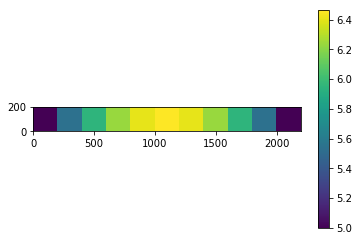

In [32]:
mm = flopy.plot.ModelMap(model=m)
#mm.plot_ibound()
#mm.plot_grid()
mm.plot_array(headarray)
hplot = mm.plot_array(headarray)
plt.colorbar(hplot)
#help(mm.plot_array)

#### plotting in model grid (ncol, nlay)

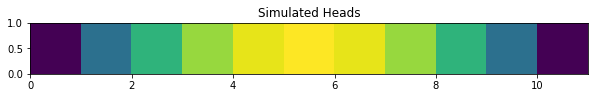

In [33]:
# Make a simple head plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
im = ax.imshow(headarray[:, 0, :], interpolation='nearest',
               extent=(0, ncol, 0, nlay))
ax.set_title('Simulated Heads')

#### The head levels from which we are creating the above plot

In [34]:
print(headarray)

[[[ 5.          5.54236889  5.95140743  6.23724508  6.40634823  6.46232891
    6.40634823  6.23724508  5.95140743  5.54236889  5.        ]]]
